In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../dataset/loan_approval_dataset.csv')
print(data.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [3]:
data.columns = data.columns.str.strip()

In [4]:
print(data.isnull().sum())
data.dropna(inplace=True)

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


In [5]:
from sklearn.preprocessing import LabelEncoder

label_cols = ["education", "self_employed", "loan_status"]
le = LabelEncoder()

for col in label_cols:
    data[col] = le.fit_transform(data[col])

In [6]:
x = data.drop(["loan_id","loan_status"], axis=1)
y = data["loan_status"]

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))

Accuracy: 97.19%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       536
           1       0.97      0.95      0.96       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



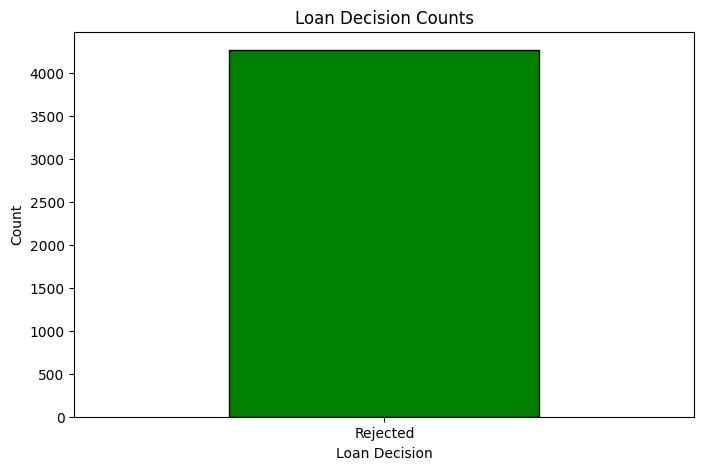

In [19]:
import matplotlib.pyplot as plt

# Count the occurrences of each loan decision
loan_decision_counts = data['loan_decision'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
loan_decision_counts.plot(kind='bar', color=['green', 'red'], edgecolor='black')
plt.title('Loan Decision Counts')
plt.xlabel('Loan Decision')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


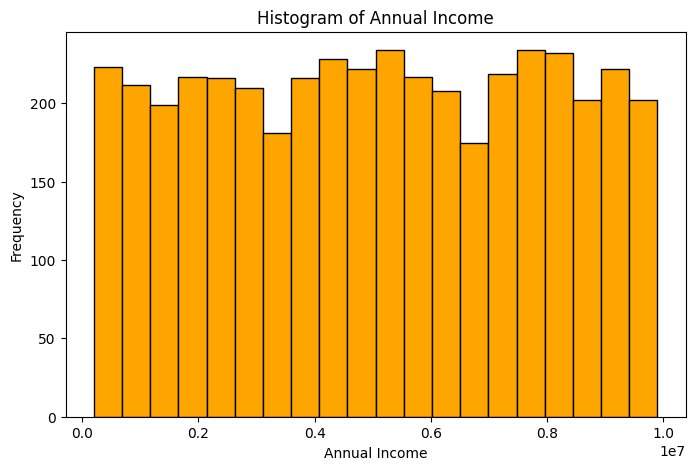

In [13]:
# Histogram for the 'income_annum' column
plt.figure(figsize=(8, 5))
plt.hist(data['income_annum'], bins=20, color='orange', edgecolor='black')
plt.title('Histogram of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

In [10]:
import joblib
import os

os.makedirs("../model", exist_ok=True)
joblib.dump(model, "../model/model.pkl")
joblib.dump(scaler, "../model/preprocessor.pkl")

['../model/preprocessor.pkl']